In [2]:
from osgeo import gdal, osr, ogr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ds = gdal.Open("geo-files/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif")
proj = ds.GetProjection()

In [4]:
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fd5ec4b6b70> >

In [5]:
ds.RasterXSize

17000

In [6]:
ds.RasterYSize


9000

In [7]:
# Number of bands
ds.RasterCount

1

In [8]:
# Metadata for the raster dataset
ds.GetMetadata()

{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}

In [9]:
# Read the raster band as separate variable
band = ds.GetRasterBand(1)

In [10]:
# Check type of the variable 'band'
type(band)

osgeo.gdal.Band

In [11]:
# Data type of the values
gdal.GetDataTypeName(band.DataType)

'Float32'

In [12]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

In [13]:
# Fetch metadata for the band
band.GetMetadata()

{'STATISTICS_MAXIMUM': '33.270000457764',
 'STATISTICS_MEAN': '12.715703254367',
 'STATISTICS_MINIMUM': '3.1400001049042',
 'STATISTICS_STDDEV': '3.1190120842843'}

In [14]:
# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

[ NO DATA VALUE ] =  -9999.0
[ MIN ] =  3.1400001049042
[ MAX ] =  33.270000457764


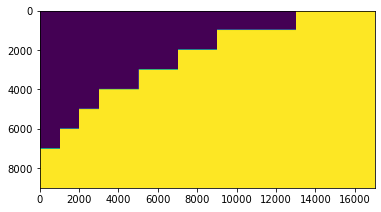

In [15]:
array = band.ReadAsArray()

plt.plot()
plt.imshow(array)

In [16]:
ds.GetGeoTransform()

(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)

In [17]:
srs=osr.SpatialReference(wkt=proj)
if srs.IsProjected:
    print(srs.GetAttrValue('projcs'))
print(srs.GetAttrValue('geogcs'))

Belge 1972 / Belgian Lambert 72
Belge 1972


In [18]:
proj

'PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]'

In [19]:
srs.GetTOWGS84()

(-106.869, 52.2978, -103.724, 0.3366, -0.457, 1.8422, -1.2747)

In [20]:
print(srs.GetAttrValue('AUTHORITY',1))

31370


In [ ]:
proj.values

In [24]:
arr = gdal.ReadAsMaskedArray(ds)

AttributeError: module 'osgeo.gdal' has no attribute 'ReadAsMaskedArray'